# Crude Oil WTI #1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Crude Oil WTI Futures 85-04.csv",index_col='Date',parse_dates=True)

In [3]:
df.head()

Price   Open   High    Low     Vol. Change %
Date                                                    
2004-12-13  41.01  40.90  41.65  40.25   95.85K    0.74%
2004-12-10  40.71  42.50  43.29  40.25  118.14K   -4.28%
2004-12-09  42.53  42.05  43.20  41.95   99.43K    1.41%
2004-12-08  41.94  41.41  42.50  40.45  127.25K    1.16%
2004-12-07  41.46  43.10  43.19  41.38  109.07K   -3.54%

In [4]:
df.shape

(5000, 6)

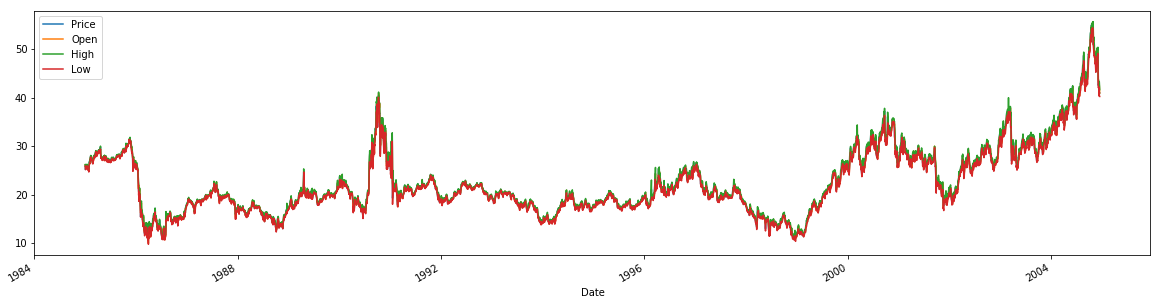

In [5]:
df.plot(figsize=(20,5));

In [6]:
#def str_to_num(volume) :
#    floatnum = float(volume[:-1])
#    return floatnum *1000
#df['Volume'] = df['Vol.'].apply(str_to_num)

In [7]:
pdf = df.drop(['Vol.','Change %','Open','High','Low'],axis=1)

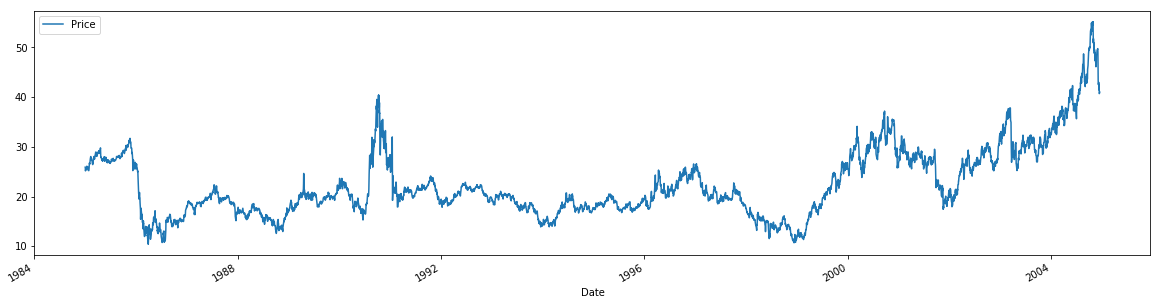

In [8]:
pdf.plot(figsize=(20,5));

## Residual of Trend

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.array(pdf.index).reshape((-1,1)), pdf['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [11]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],trend_model.intercept_))

Trend model coefficient=1.8700915017790193e-17 and intercept=7.679914121547595


(array([724276., 725737., 727198., 728659., 730120., 731581., 733042.]),
 <a list of 7 Text xticklabel objects>)

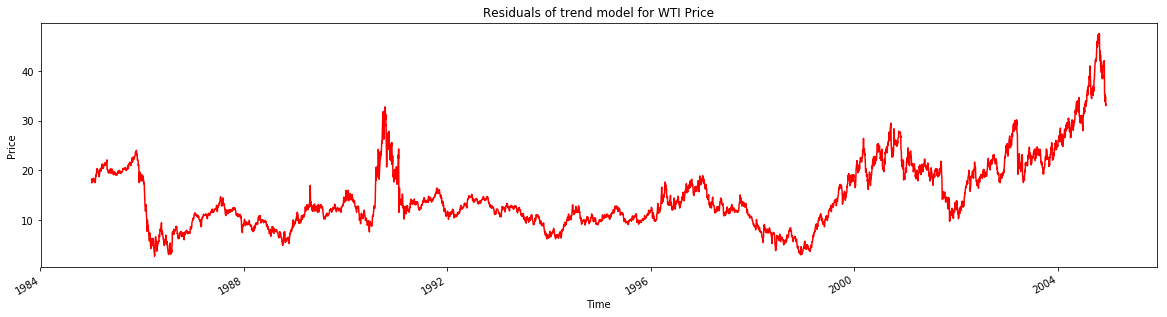

In [12]:
residuals = np.array(pdf['Price'])-trend_model.predict(np.array(range(1,5001)).reshape((-1,1)))

plt.figure(figsize=(20,5))
pd.Series(data=residuals,index=pdf.index).plot(color='r')
plt.title('Residuals of trend model for WTI Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=30)

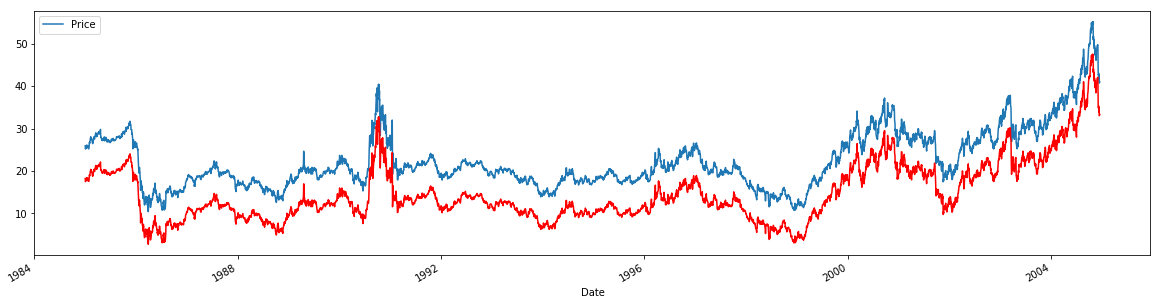

In [13]:
pdf.plot(figsize=(20,5))
pd.Series(data=residuals,index=pdf.index).plot(color='r',label='Residual of trend')

## ETS Decompose

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

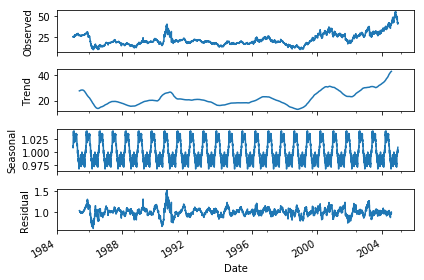

In [15]:
result = seasonal_decompose(pdf['Price'], model='multiplicative',freq=200)  # model='mul' also works
result.plot();

## SMA

In [16]:
pdf['6-month-SMA'] = pdf['Price'].rolling(window=182).mean()
pdf['12-month-SMA'] = pdf['Price'].rolling(window=365).mean()

In [17]:
pdf.iloc[400:420]

Price  6-month-SMA  12-month-SMA
Date                                        
2003-05-07  26.23    30.819615     35.795616
2003-05-06  25.72    30.780659     35.715616
2003-05-05  26.49    30.741484     35.642192
2003-05-02  25.67    30.695055     35.565479
2003-05-01  26.03    30.648681     35.486301
2003-04-30  25.80    30.598462     35.406959
2003-04-29  25.24    30.545220     35.329151
2003-04-28  25.49    30.495275     35.255123
2003-04-25  26.26    30.440659     35.180110
2003-04-24  26.64    30.394341     35.107041
2003-04-23  26.65    30.357033     35.035753
2003-04-22  29.91    30.331813     34.975178
2003-04-21  30.87    30.312253     34.919781
2003-04-17  30.55    30.289341     34.866740
2003-04-16  29.18    30.261154     34.809370
2003-04-15  29.29    30.235385     34.753616
2003-04-14  28.63    30.207967     34.696411
2003-04-11  28.14    30.177418     34.636795
2003-04-10  27.46    30.142692     34.576027
2003-04-09  28.85    30.122527     34.521151

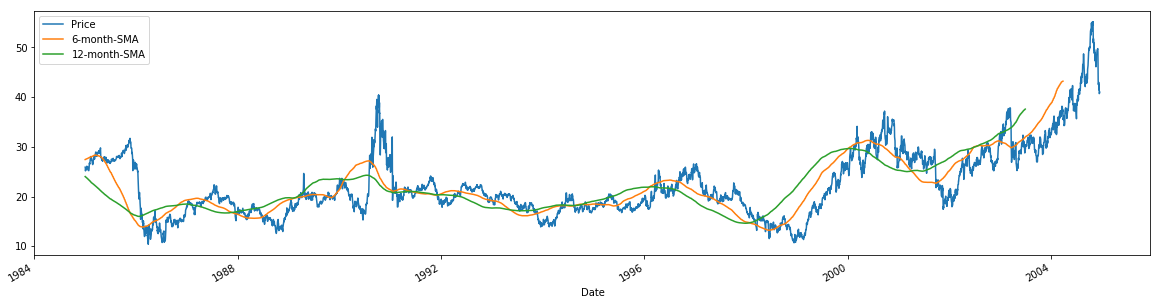

In [18]:
pdf.plot(figsize=(20,5));

## EMWA

In [19]:
pdf['EWMA12'] = pdf['Price'].ewm(span=365,adjust=False).mean()

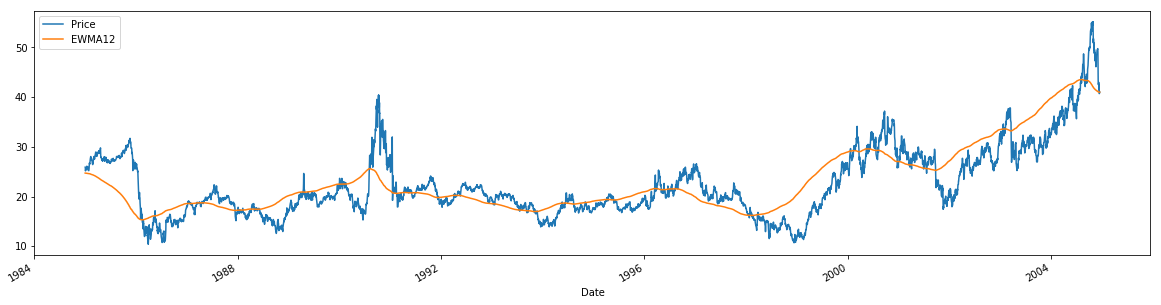

In [20]:
pdf[['Price','EWMA12']].plot(figsize=(20,5));

## Compare SMA to EMWA

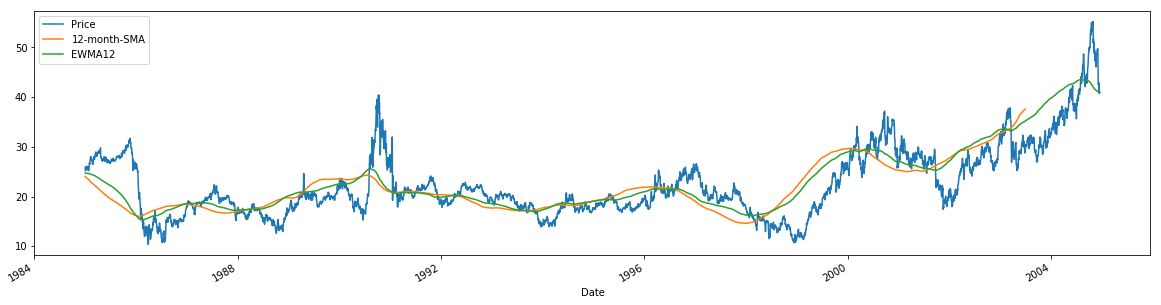

In [21]:
pdf[['Price','12-month-SMA','EWMA12']].plot(figsize=(20,5));

## Exponential Smoothing

In [22]:
pdf.head()

Price  6-month-SMA  12-month-SMA     EWMA12
Date                                                   
2004-12-13  41.01          NaN           NaN  41.010000
2004-12-10  40.71          NaN           NaN  41.008361
2004-12-09  42.53          NaN           NaN  41.016676
2004-12-08  41.94          NaN           NaN  41.021721
2004-12-07  41.46          NaN           NaN  41.024116

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [24]:
pdf['DESadd12'] = ExponentialSmoothing(pdf['Price'], trend='add').fit().fittedvalues.shift(-1)
pdf.head()

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Price  6-month-SMA  12-month-SMA     EWMA12   DESadd12
Date                                                              
2004-12-13  41.01          NaN           NaN  41.010000  41.010026
2004-12-10  40.71          NaN           NaN  41.008361  40.711494
2004-12-09  42.53          NaN           NaN  41.016676  42.520947
2004-12-08  41.94          NaN           NaN  41.021721  41.942892
2004-12-07  41.46          NaN           NaN  41.024116  41.462404

In [25]:
pdf['DESmul12'] = ExponentialSmoothing(pdf['Price'], trend='mul').fit().fittedvalues.shift(-1)
pdf.head()

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Price  6-month-SMA  12-month-SMA     EWMA12   DESadd12   DESmul12
Date                                                                         
2004-12-13  41.01          NaN           NaN  41.010000  41.010026  40.989604
2004-12-10  40.71          NaN           NaN  41.008361  40.711494  40.691212
2004-12-09  42.53          NaN           NaN  41.016676  42.520947  42.500005
2004-12-08  41.94          NaN           NaN  41.021721  41.942892  41.921967
2004-12-07  41.46          NaN           NaN  41.024116  41.462404  41.441728

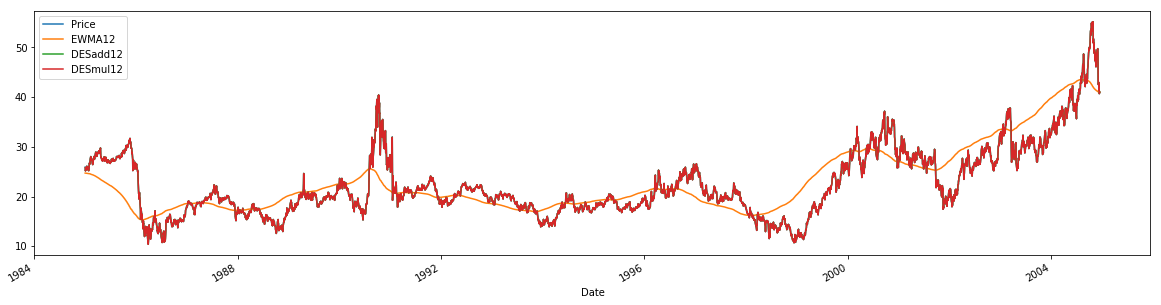

In [26]:
pdf[['Price','EWMA12','DESadd12','DESmul12']].plot(figsize=(20,5));

## Forecast with Holt-Winters Method

In [27]:
pdf.index

DatetimeIndex(['2004-12-13', '2004-12-10', '2004-12-09', '2004-12-08',
               '2004-12-07', '2004-12-06', '2004-12-03', '2004-12-02',
               '2004-12-01', '2004-11-30',
               ...
               '1985-01-15', '1985-01-14', '1985-01-11', '1985-01-10',
               '1985-01-09', '1985-01-08', '1985-01-07', '1985-01-04',
               '1985-01-03', '1985-01-02'],
              dtype='datetime64[ns]', name='Date', length=5000, freq=None)

In [36]:
train_data = pdf[1001:]
test_data = pdf[:1001]

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(pdf['Price'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


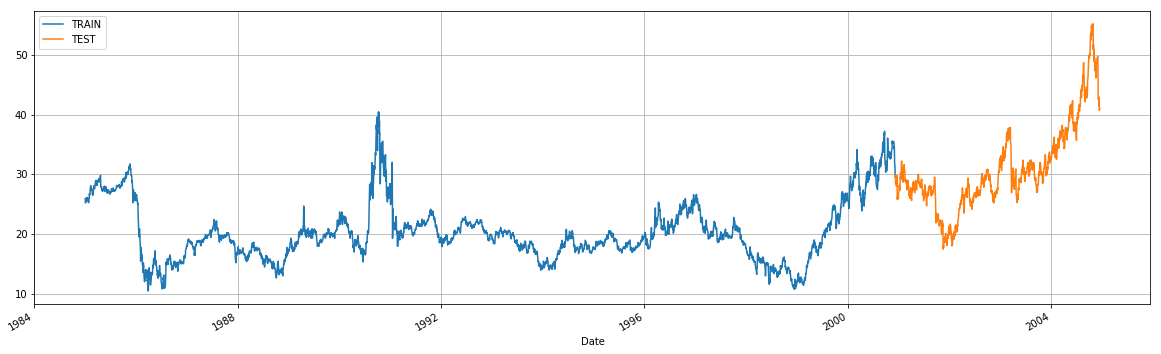

In [37]:
train_data['Price'].plot(legend=True,label='TRAIN')
test_data['Price'].plot(legend=True,label='TEST',figsize=(20,6),grid=True)

In [38]:
train_data.head()

Price  6-month-SMA  12-month-SMA     EWMA12   DESadd12   DESmul12
Date                                                                         
2000-12-05  29.53    27.991374     25.435479  27.157877  29.531581  29.516857
2000-12-04  31.22    28.015110     25.450110  27.180074  31.211594  31.196263
2000-12-01  32.02    28.044725     25.466192  27.206522  32.015975  32.000145
2000-11-30  33.82    28.085659     25.486603  27.242661  33.811019  33.794408
2000-11-29  34.63    28.122582     25.506603  27.283029  34.625923  34.608796

In [40]:
test_data.tail()

Price  6-month-SMA  12-month-SMA     EWMA12   DESadd12   DESmul12
Date                                                                         
2000-12-12  29.68    27.925275     25.379096  27.097388  29.675302  29.660650
2000-12-11  29.50    27.937912     25.391205  27.110517  29.500873  29.486181
2000-12-08  28.44    27.948297     25.399781  27.117782  28.445281  28.431014
2000-12-07  29.35    27.960934     25.412603  27.129980  29.345496  29.331003
2000-12-06  29.85    27.975659     25.423808  27.144843  29.847488  29.832702

In [43]:
test_data.index

DatetimeIndex(['2004-12-13', '2004-12-10', '2004-12-09', '2004-12-08',
               '2004-12-07', '2004-12-06', '2004-12-03', '2004-12-02',
               '2004-12-01', '2004-11-30',
               ...
               '2000-12-19', '2000-12-18', '2000-12-15', '2000-12-14',
               '2000-12-13', '2000-12-12', '2000-12-11', '2000-12-08',
               '2000-12-07', '2000-12-06'],
              dtype='datetime64[ns]', name='Date', length=1001, freq=None)

In [48]:
test_predictions = fitted_model.forecast(1000)

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


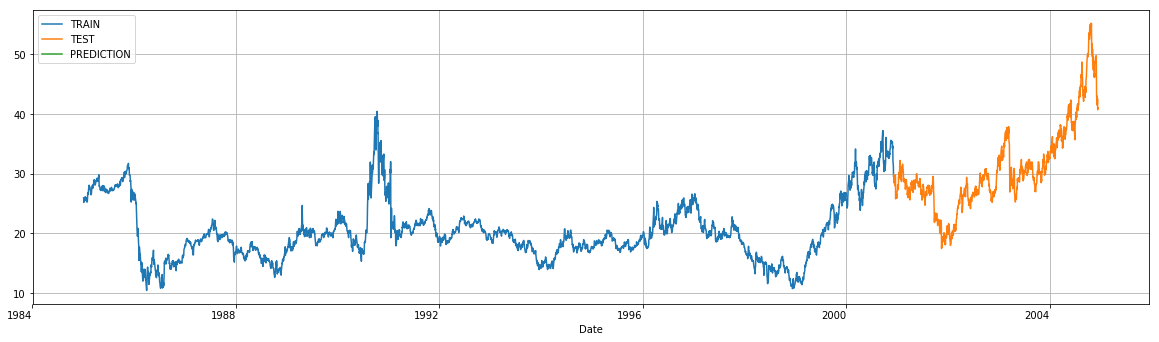

In [49]:
train_data['Price'].plot(legend=True,label='TRAIN')
test_data['Price'].plot(legend=True,label='TEST',figsize=(20,6))
test_predictions.plot(legend=True,label='PREDICTION',grid=True)